Objetivo:

Con estos datos se busca generar clústers que permitan caracterizar a los clientes de acuerdo a diversos factores. 


Los datos cuentan con información relacionada a los montos gastados por los clientes en distintos productos, así como su salario, edad, si ha aceptado campañas publicitarias, y los medios de compra que emplea. 



-------------------
## Variables en los datos
-------------------
- id: ID único para cada cliente
- año_nacimiento : Edad del cliente
- niños_casa: Número de niños pequeños en el hogar del cliente
- jóvenes_casa: Número de adolescentes en el hogar del cliente
- salario: ingresos familiares anuales del cliente
- recency: Número de días desde la última compra
- monto_pescado: la cantidad gastada en productos pesqueros en los últimos 2 años
- monto_carnes: la cantidad gastada en productos cárnicos en los últimos 2 años
- monto_frutas: La cantidad gastada en productos de frutas en los últimos 2 años
- monto_dulces: Cantidad gastada en productos dulces en los últimos 2 años
- monto_vinos: La cantidad gastada en productos vinícolas en los últimos 2 años
- monto_oro: la cantidad gastada en productos de oro en los últimos 2 años
- cant_compras_descuento: Número de compras realizadas con descuento
- cant_compras_catalogo: número de compras realizadas mediante catálogo (compra de productos enviados por correo)
- cant_compras_tienda: Número de compras realizadas directamente en las tiendas
- cant_compras_web: Número de compras realizadas a través del sitio web de la empresa
- cant_visitas_web_mes: Número de visitas al sitio web de la empresa en el último mes

## Librerías

In [ ]:
# eliminar "warnings"
import warnings
warnings.filterwarnings('ignore')

# leer los datos
import numpy as np
import pandas as pd

# visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

Importar los datos a collab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Marketing data6.csv to Marketing data6 (1).csv



Cargar el dataset

In [ ]:
datos = pd.read_csv("Marketing data6.csv", encoding='latin-1')
datos.head()

,id,año_nacimiento,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,...,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,acepta_cmp_1,acepta_cmp_2,acepta_cmp_3,acepta_cmp_4,acepta_cmp_5,acepta_cmp_6
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,4,4,6,1,0,1,0,0,0,0
1,1,1961,57091.0,0,0,0,464,5,64,7,...,7,3,7,5,0,1,0,0,0,1
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,3,2,5,2,0,0,0,0,0,0
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,1,0,2,7,0,0,0,0,0,0
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,3,1,2,7,1,1,0,0,0,0


Ahora, se unen las variables acepta_cmp_1",	"acepta_cmp_2",	"acepta_cmp_3",	"acepta_cmp_4",	"acepta_cmp_5",	"acepta_cmp_6" para generar una variable nueva

In [ ]:
datos["cant_campañas_acepta"] = datos[["acepta_cmp_1",	"acepta_cmp_2",	"acepta_cmp_3",	"acepta_cmp_4",	"acepta_cmp_5",	"acepta_cmp_6"]]. sum(axis=1)


In [ ]:
datos_x = datos[["id", "año_nacimiento",  "salario", "niños_casa", "jovenes_casa", "recency",	"monto_vinos", "monto_frutas", 
                "monto_carnes",	"monto_pescado", "monto_dulces", "monto_oro", "cant_compras_descuento", "cant_compras_web", 
                "cant_compras_catalogo", "cant_compras_tienda", "cant_visitas_web_mes", "cant_campañas_acepta"]]

## Análisis univariado y bivariado

Revisar la información del  dataset

In [ ]:
datos_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2240 non-null   int64  
 1   año_nacimiento          2240 non-null   int64  
 2   salario                 2240 non-null   float64
 3   niños_casa              2240 non-null   int64  
 4   jovenes_casa            2240 non-null   int64  
 5   recency                 2240 non-null   int64  
 6   monto_vinos             2240 non-null   int64  
 7   monto_frutas            2240 non-null   int64  
 8   monto_carnes            2240 non-null   int64  
 9   monto_pescado           2240 non-null   int64  
 10  monto_dulces            2240 non-null   int64  
 11  monto_oro               2240 non-null   int64  
 12  cant_compras_descuento  2240 non-null   int64  
 13  cant_compras_web        2240 non-null   int64  
 14  cant_compras_catalogo   2240 non-null   

**Observaciones:**
- Hay un total de 19 columnas y 2240 observaciones
- La columna "salario" tiene menos de 2216 valores, lo que indica que tiene valores faltantes



**Porcentaje de valores nulos en la columna de ingresos**

In [ ]:
((datos_x.isnull().sum()/datos_x.shape[0])*100)['salario']

0.0

**Observaciones:**
- La variable "salario" tiene un 1.07% de valores faltantes.

**Revisión de registros de clientes duplicados**

In [ ]:
duplicados_id = datos_x[datos_x.duplicated("id")]
print(duplicados_id)

Empty DataFrame
Columns: [id, año_nacimiento, salario, niños_casa, jovenes_casa, recency, monto_vinos, monto_frutas, monto_carnes, monto_pescado, monto_dulces, monto_oro, cant_compras_descuento, cant_compras_web, cant_compras_catalogo, cant_compras_tienda, cant_visitas_web_mes, cant_campañas_acepta]
Index: []


No hay registros duplicados en el set de datos

**Ahora, se procede a revisar el summary de las distintas variables numéricas**


In [ ]:
#columnas
num_cols = datos_x.columns[1:] 

In [ ]:
#imprimir el summary de todas las variables de num_cols 
for i in num_cols:
  print(datos_x[i].describe().T)
  print("-" * 40)

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: año_nacimiento, dtype: float64
----------------------------------------
count      2240.000000
mean      52237.552232
std       25037.970704
min        1730.000000
25%       35538.750000
50%       51342.000000
75%       68289.750000
max      666666.000000
Name: salario, dtype: float64
----------------------------------------
count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: niños_casa, dtype: float64
----------------------------------------
count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: jovenes_casa, dtype: float64
----------------------------------------
count    2240

**Observaciones:**

--
año_nacimiento:


* El año mínimo es 1893 lo cual es bastante improbable, por lo tanto puede ser un error.

* El 75% de los compradores son mayores de 44 años.

* Los clientes más jóvenes tienen entre 25 y 43 años y representan el 25% del total de clientes.

--
salario:

* En cuanto a "salario", el promedio es de casi 52k dólares.

* Parece que hay valores atípicos, como el ingreso de 666.666,00 dólares, que deben analizarse para determinar si los datos son relevantes para el análisis.

--
recency:

* La variable "recency" nos permite saber que para el 75% de los clientes han pasado más de 24 días desde su última compra, lo que significa que el otro 25% de compradores ha comprado al menos dos veces al mes.

* 50% no ha comprado por más de 49 días.

--
monto_vinos:

* El gasto medio en vino por cliente durante dos años es de 303,94 dólares, unos 152,00 dólares al año.

* El 25% de los clientes gastó más de 504,25 dólares en 2 años, y al menos alguien invirtió 1493,00 dólares en este tipo de bebida.
Puede ser interesante conocer el número de vinos que compra cada persona y sus tipos para futuros análisis.

--
monto_frutas:

* Durante los últimos dos años, el gasto promedio en fruta es de solo 26,30 dólares por persona, y el 50% de los clientes no gastaron más de 8 dólares en este producto. Esto puede indicar que la mayoría de los consumidores no compran frutas con frecuencia.

* Hay un 25% de clientes que gastaron entre 8,00 dólares y 199,00 dólares.

--
monto_carnes:

* El gasto promedio en carne es de 167 dólares. El 25% de los clientes compra entre 16,00 dólares y 67,00 dólares, mientras que el 25% gasta entre 232,00 dólares y 1725,00 dólares en dos años.
La carne es el producto con mayor gasto medio por cliente de todos los productos analizados.

--
monto_pescados:

* En cuanto a los productos de pescado, el 50% de los clientes tienen un consumo bajo de estos productos, por debajo de los 12,00 dólares, y el 25% de los clientes gastan entre 50,00 dólares y 259,00 dólares.


--
Canales de compra:
* El canal con mayor número medio de compras es Tienda, con una media de 5,8 compras por cliente, seguido del canal Web con una media de 4,1 compras por cliente. El canal con la media más baja es Descuento, con 2,33 de media.


--
niños y jóvenes:
* El 25% de los clientes tienen entre 1 y 2 niños o adolescentes en casa.

- Revisar los outliers en la variable "año_nacimiento"

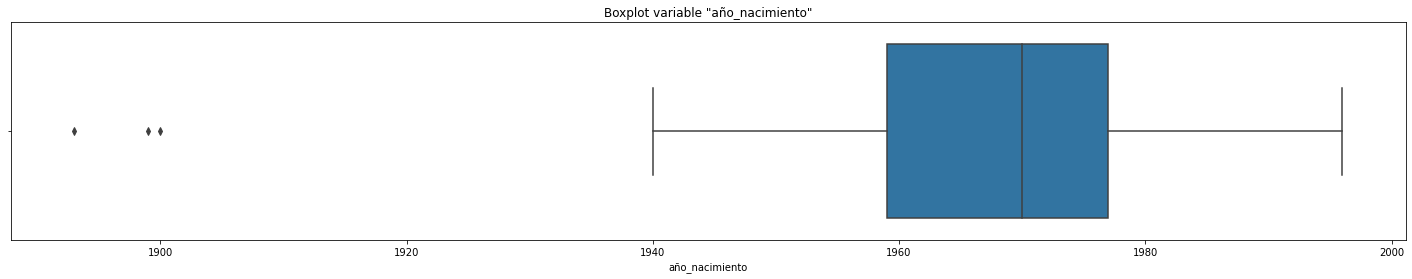

In [ ]:
plt.figure(figsize=(25,4))
sns.boxplot(datos_x['año_nacimiento'])
plt.title('Boxplot variable "año_nacimiento"')
plt.show()

Del boxplot se observa que hay datos de nacimiento inferiores a 1900, lo que no es posible. Por esta razón se eliminan esos datos:

In [ ]:
#Se filtra el set de datos por los datos con "año_nacimiento" inferiores a 1900 para encontrar cuáles son las observaciones que nos interesa eliminar
datos_x[datos_x['año_nacimiento'] < 1900]

,id,año_nacimiento,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,monto_dulces,monto_oro,cant_compras_descuento,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,cant_campañas_acepta
513,11004,1893,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0
827,1150,1899,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,1


Ahora se procede a eliminar esas observaciones del set de datos

In [ ]:
datos_x = datos_x[datos_x['año_nacimiento'] > 1900]

In [ ]:
#Revisamos la forma del set de datos
datos_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2237 non-null   int64  
 1   año_nacimiento          2237 non-null   int64  
 2   salario                 2237 non-null   float64
 3   niños_casa              2237 non-null   int64  
 4   jovenes_casa            2237 non-null   int64  
 5   recency                 2237 non-null   int64  
 6   monto_vinos             2237 non-null   int64  
 7   monto_frutas            2237 non-null   int64  
 8   monto_carnes            2237 non-null   int64  
 9   monto_pescado           2237 non-null   int64  
 10  monto_dulces            2237 non-null   int64  
 11  monto_oro               2237 non-null   int64  
 12  cant_compras_descuento  2237 non-null   int64  
 13  cant_compras_web        2237 non-null   int64  
 14  cant_compras_catalogo   2237 non-null   

**Ahora, se cambia la columna de "año_nacimiento" por una que indique la edad de los clientes**

In [ ]:
# Primero se crea una columna donde se encuentra el año actual (Se repite el año 2022 un total  de 2037 veces, ya que esa es la cantidad de filas en el set de datos)
datos_x["año_actual"] =  np.repeat(2022,2237)

#Luego, se resta la columna de "año_nacimiento" de la columna que acabamos de crear (año_actual) para obtener la edad 
datos_x['edad'] = datos_x["año_actual"] - datos_x["año_nacimiento"] 

#Ahora, creamos un set de datos donde se tiene la nueva variable en lugar de "año_nacimiento" y se elimina la columna "id"
datos_x1 = datos_x[["edad", "salario", "niños_casa", "jovenes_casa", "recency",	"monto_vinos", "monto_frutas", "monto_carnes",	
                    "monto_pescado", "monto_dulces", "monto_oro", "cant_compras_descuento", "cant_compras_web", "cant_compras_catalogo", 
                    "cant_compras_tienda", "cant_visitas_web_mes", "cant_campañas_acepta"]]

datos_x1.head()

,edad,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,monto_dulces,monto_oro,cant_compras_descuento,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,cant_campañas_acepta
0,52,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,61,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,2
2,64,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,55,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,33,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,2


Revisamos la variable "edad" que se acaba de crear

In [ ]:
datos_x1["edad"].describe().T

count    2237.000000
mean       53.098346
std        11.701917
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: edad, dtype: float64

Vemos que la media de la edad de los compradores es de 53 años, con un máximo de 82 años  

**Revisión de los outliers para la variable Income** 

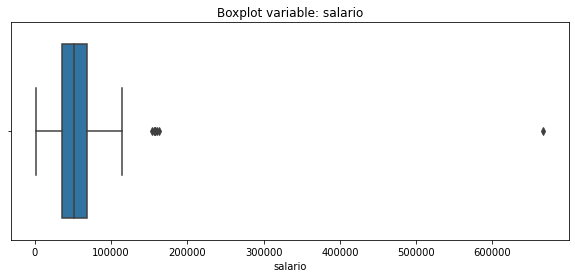

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(datos_x1['salario'])
plt.title("Boxplot variable: salario")
plt.show()


- Se calcula el valor del bigote superior del boxplot


In [ ]:
# I cuartil
Q1 = datos.quantile(q=0.25)
# III cuartil
Q3 = datos.quantile(q=0.75) 

# rango intercuartil
rango_ic = Q3 - Q1            

# bigote_superior
bigote_superior = (Q3 + 1.5*rango_ic)["salario"]
print(bigote_superior)

117416.25


In [ ]:
# Ahora, una vez que hemos identificado las observaciones  outliers, podemos imprimirlas
pd.set_option('display.max_columns', None)
datos_x1[datos_x1.salario > bigote_superior]

,edad,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,monto_dulces,monto_oro,cant_compras_descuento,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,cant_campañas_acepta
325,45,157146.0,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,0
497,40,160803.0,0,0,21,55,16,1622,17,3,4,15,0,28,1,0,0
527,45,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0
731,46,162397.0,1,1,31,85,1,16,2,1,2,0,0,0,1,1,0
853,51,157733.0,1,0,37,39,1,9,2,0,8,0,1,0,1,1,0
1826,47,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0
1925,73,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0
2204,49,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0


**Observaciones**

- Vemos que hay únicamente 8 observaciones que pueden catalogarse como outliers o valores extremos según su comportamiento para la variable "salario", de estas observaciones, únicamente 3 (índices = 325, 497, 2204) han realizado compras con regularidad en estos dos años, las demás han realizado muy pocas compras

Ahora obtenemos una descripción de esos datos extremos y de los restantes para poder compararlos

In [ ]:
# Descripción de los outliers
datos_x1[datos_x1.salario > bigote_superior].describe().T

,count,mean,std,min,25%,50%,75%,max
edad,8.0,49.500,10.028531,40.0,45.00,46.5,49.50,73.0
salario,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
niños_casa,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
jovenes_casa,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
monto_vinos,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
monto_frutas,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
monto_carnes,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
monto_pescado,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0
monto_dulces,8.0,1.250,0.886405,0.0,1.00,1.0,1.25,3.0


In [ ]:
# Descripción del resto de los datos (no marcados como outliers)
datos_x1[datos_x1.salario < bigote_superior].describe().T

,count,mean,std,min,25%,50%,75%,max
edad,2229.0,53.111261,11.707430,26.0,45.0,52.0,63.0,82.0
salario,2229.0,51619.078959,20601.221567,1730.0,35416.0,51342.0,68118.0,113734.0
niños_casa,2229.0,0.444594,0.538636,0.0,0.0,0.0,1.0,2.0
jovenes_casa,2229.0,0.507402,0.544735,0.0,0.0,0.0,1.0,2.0
recency,2229.0,49.106326,28.946476,0.0,24.0,49.0,74.0,99.0
monto_vinos,2229.0,304.991476,336.761943,0.0,24.0,176.0,505.0,1493.0
monto_frutas,2229.0,26.348587,39.764060,0.0,2.0,8.0,33.0,199.0
monto_carnes,2229.0,165.283984,219.336589,0.0,16.0,67.0,231.0,1725.0
monto_pescado,2229.0,37.642441,54.700548,0.0,3.0,12.0,50.0,259.0
monto_dulces,2229.0,27.161507,41.338945,0.0,1.0,8.0,34.0,263.0


**Observaciones**

La edad promedio (49 años) de los clientes "outlier" es inferior al del resto, el recency promedio es inferior (33 días comparado contra 49 días). El monto que invierten en productos es inferior al de los otros clientes a excepción de lo que gastan en carnes. Los clientes "outlier" compran, en promedio, más en descuento y en catálogo que los otros, pero realizan menos compras en la tienda y su nivel de  visitas mensual a la web y las compras que realizan por este medio es inferior en comparación.

- Podemos eliminar las 5 observaciones de "outlier" en los índices [527, 731, 853, 1826, 1925] ya que no agregarían valor a nuestro análisis.

In [ ]:
#Se eliminan los outliers,  observaciones con los índices (527, 731, 853, 1826, 1925)
datos_x1.drop(index = [527, 731, 853, 1826, 1925], inplace = True)

**Distribución de las variables**

edad


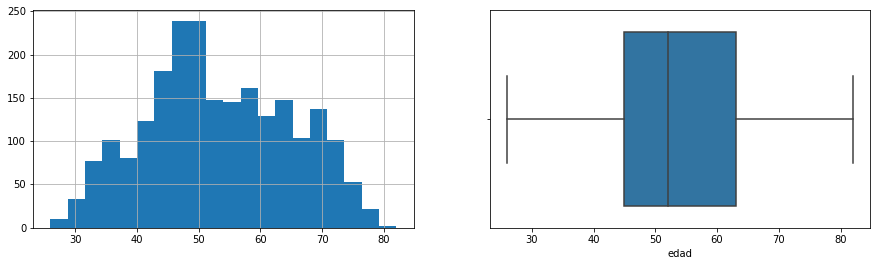

salario


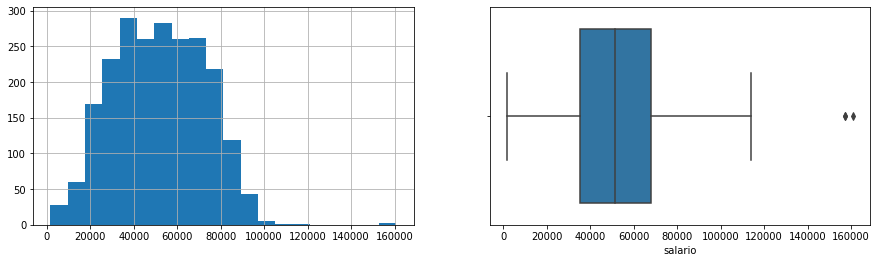

niños_casa


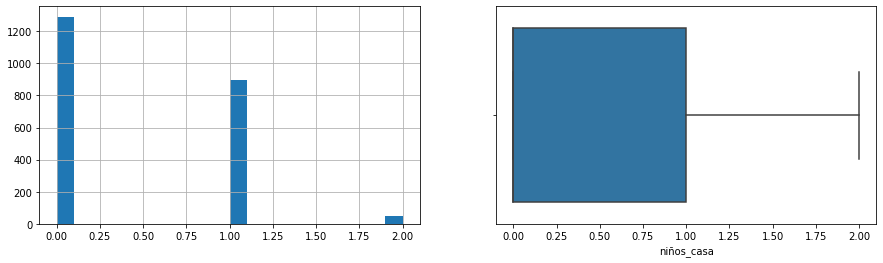

jovenes_casa


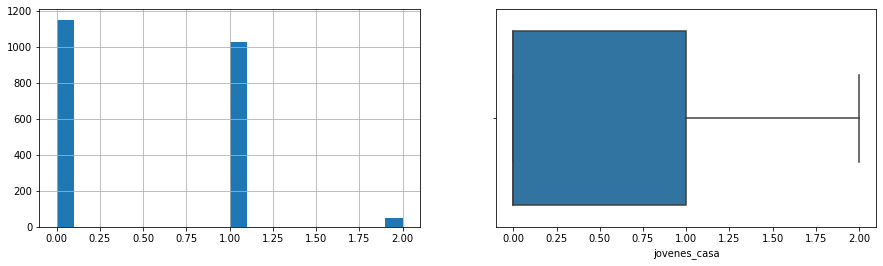

recency


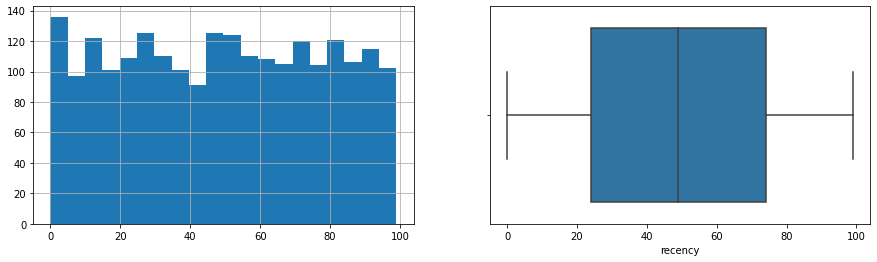

monto_vinos


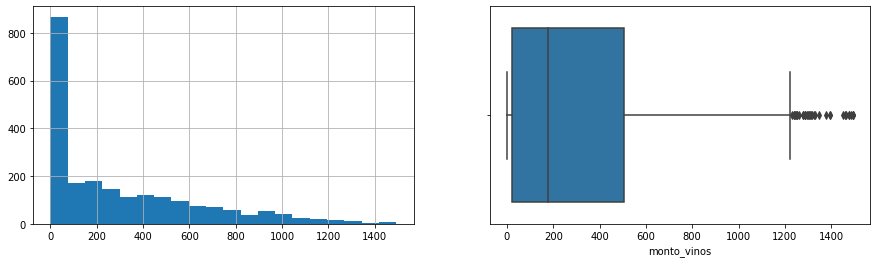

monto_frutas


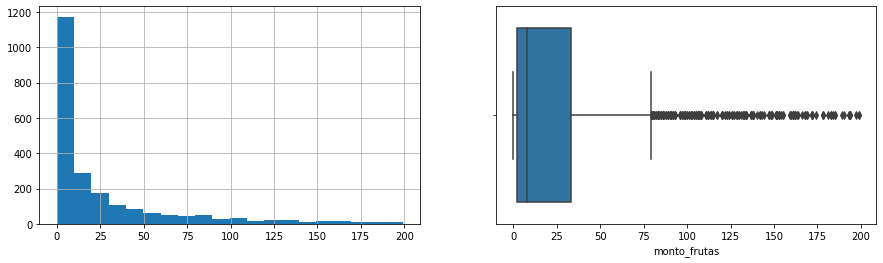

monto_carnes


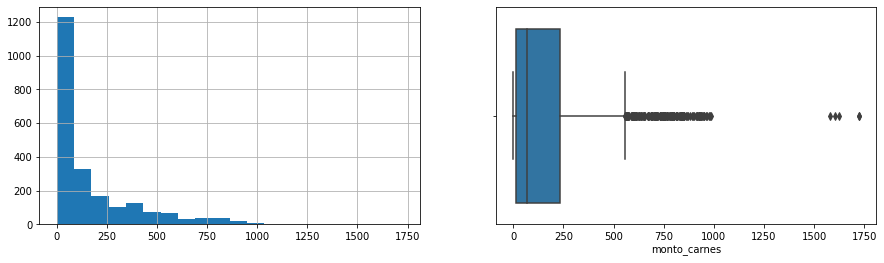

monto_pescado


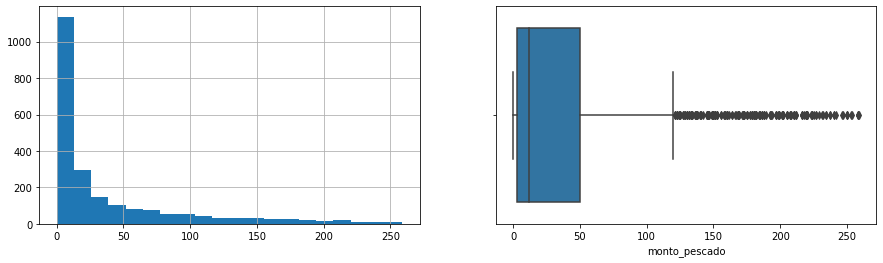

monto_dulces


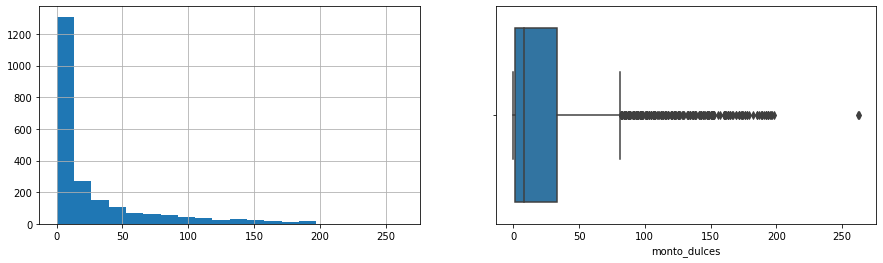

monto_oro


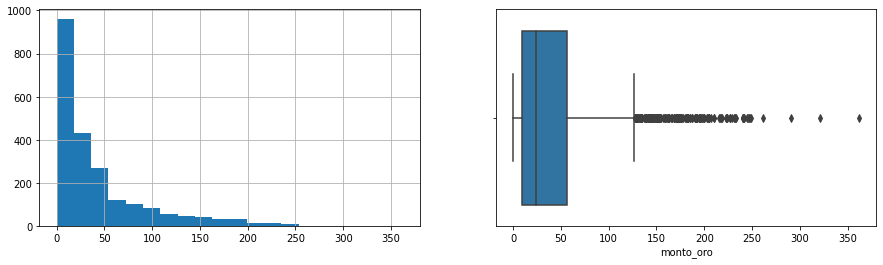

cant_compras_descuento


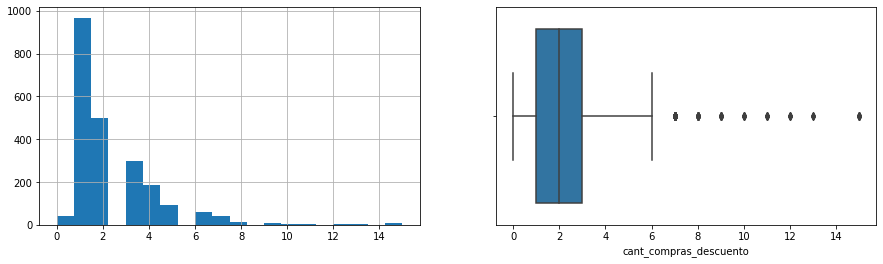

cant_compras_web


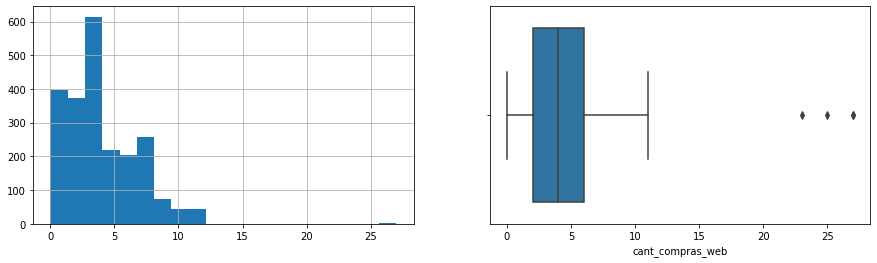

cant_compras_catalogo


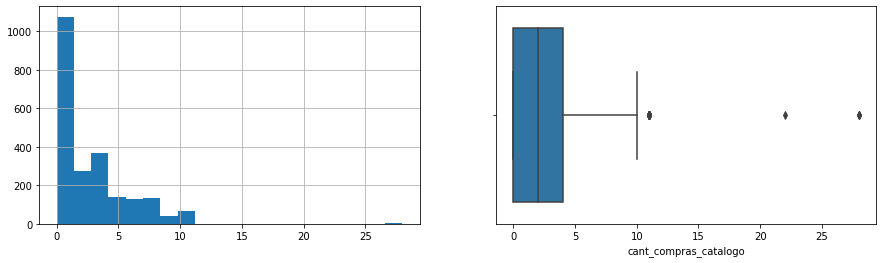

cant_compras_tienda


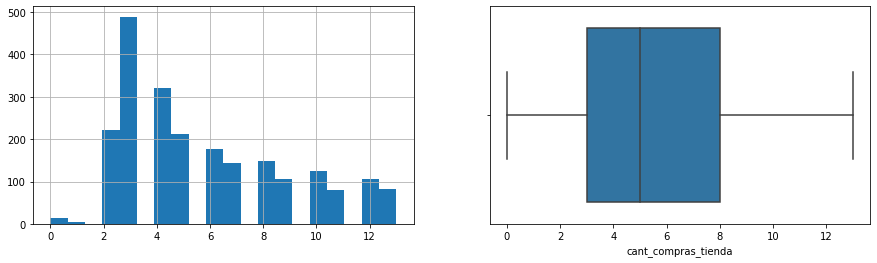

cant_visitas_web_mes


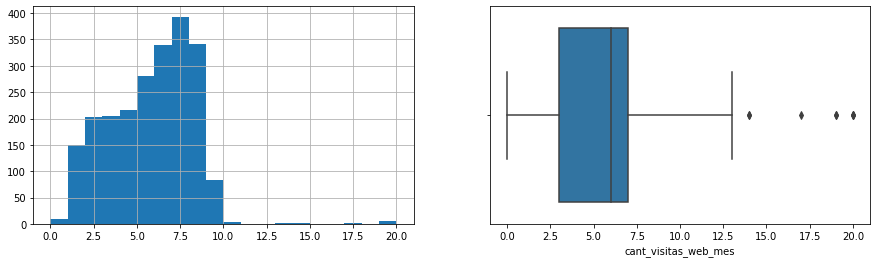

cant_campañas_acepta


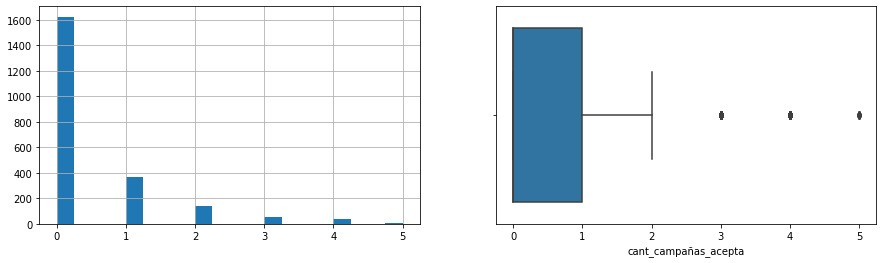

In [ ]:
#Ahora, se van a analizar las ditribuciones de las distintas variables
for i in datos_x1.columns:
  print(i)
  plt.figure(figsize=(15,4))

  plt.subplot(1,2,1)
  datos_x1[i].hist(bins = 20)
  
  plt.subplot(1,2,2)
  sns.boxplot(x = datos_x1[i])
  
  plt.show()

### **Tratamiento de datos faltantes**

Para tratar los valores faltantes en la variable "salario" se va a hacer una imputación con la mediana, dado que los datos se encuentran sesgados, haciendo que la media no se la mejor opción

In [ ]:
#Cambiar los valores nulos por la mediana en la variable "salario"
datos_x1['salario'].fillna(datos_x1.salario.median(), inplace = True)

### **Correlación entre las variables**

Ahora analizamos si se presenta correlación entre algunas de las variables y en caso de existir, qué tan fuerte es

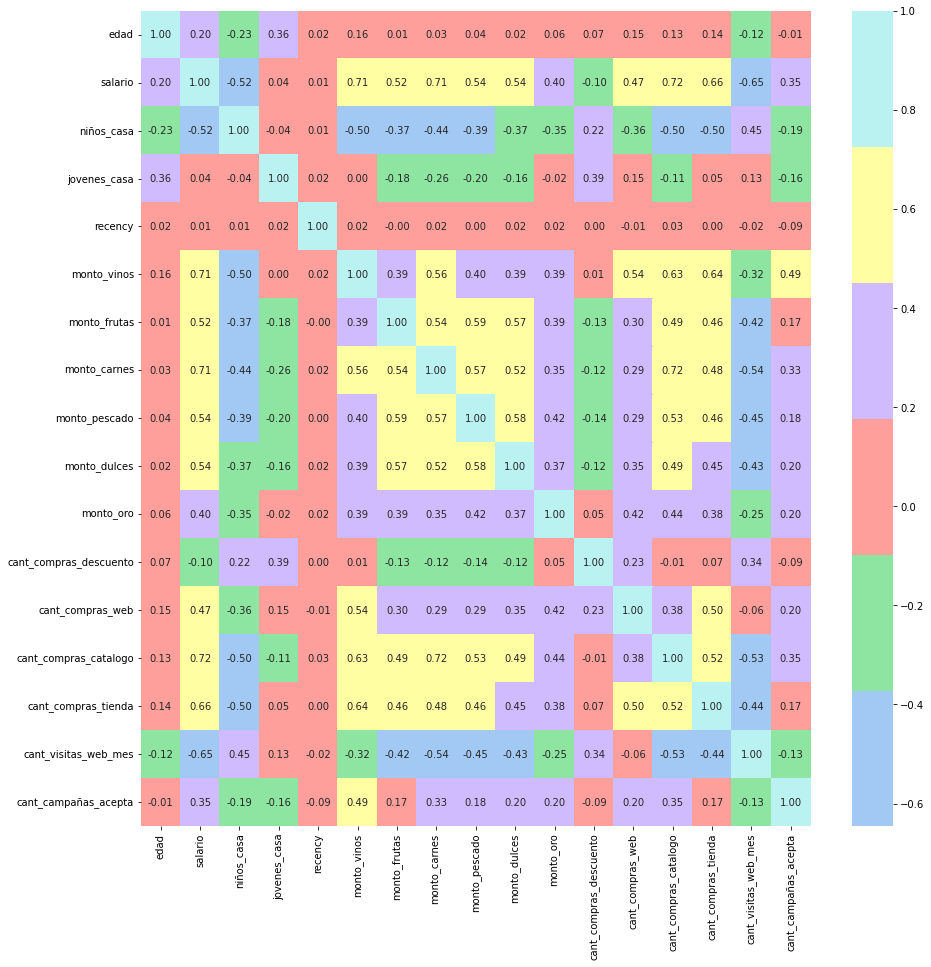

In [ ]:
plt.figure(figsize = (15,15))
color = sns.color_palette("pastel6")
sns.heatmap(datos_x1.corr(), annot = True, fmt = '0.2f', cmap = color)
plt.show()

**Observaciones:**


Las variables que presentan correlación con otras son: las variables de montos pagados por artículos a excepción del monto en oro, la cantidad de compras en la web, catálogo y en la tienda.


La variable “monto_vinos” está positivamente correlacionada con “salario” (0.71), con “cant_compras_tienda” (0.64) , “cant_compras_catalogo” (0.63), “monto_carnes” (0.56), “cant_compras_web” (0.54)
De esto se puede deducir que las personas que gastan mucho dinero en la compra de vinos, tienen un mayor poder adquisitivo, además tienden a realizar más compras en catálogo y a través de la web, y además, se relaciona con una mayor compra de productos cárnicos


### Comportamiento según la cantidad de campañas aceptadas

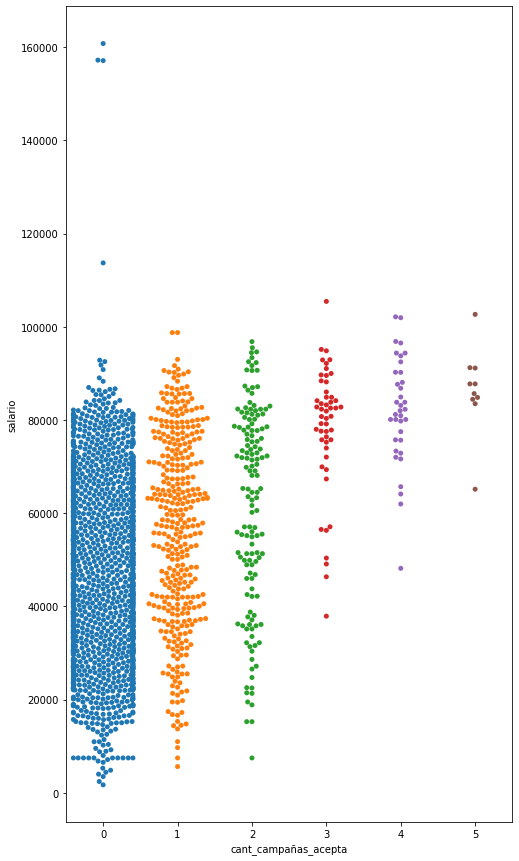

In [ ]:
plt.figure(figsize=(8,15))
sns.swarmplot(x = "cant_campañas_acepta", y = "salario", data = datos_x1)
plt.show()

**Observaciones**



Según el gráfico anterior, a mayor salario mayor es la cantidad de campañas aceptadas, además, la cantidad de personas que acepta más de una o dos campañas va disminuyendo considerablemente.

# Desarrollo de clústers para clasificación

Ahora, se procede a aplicar distintos algoritmos de clústers para determinar cuál de ellos ofrece mejores resultados y de esa forma clasificar a los clientes en grupos de acuerdo a sus características

Iniciamos por llamar las librerías correspondientes para el análisis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Para escalar los datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 


Inicialmente, se debe escalar la data para evitar sesgos en el manejo de las variables

In [ ]:
# Se emplea el escalador MinMax de la librería scikit-learn para evitar valores negativos a la hora de hacer la transformación
# 1. Se inicializa el escalador
para_escalar = MinMaxScaler()

# 2. Se aplica a los datos
datos_escalados = pd.DataFrame(para_escalar.fit_transform(datos_x1), columns = datos_x1.columns)

In [ ]:
# Se revisa el resultado de la transformación
datos_escalados.head()

,edad,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,monto_dulces,monto_oro,cant_compras_descuento,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,cant_campañas_acepta
0,0.464286,0.522433,0.0,0.0,0.0,0.126591,0.522613,0.219710,0.428571,0.718631,0.602210,0.066667,0.148148,0.142857,0.461538,0.05,0.2
1,0.625000,0.348023,0.0,0.0,0.0,0.310784,0.025126,0.037101,0.027027,0.000000,0.102210,0.066667,0.259259,0.107143,0.538462,0.25,0.4
2,0.678571,0.411993,0.0,0.5,0.0,0.089752,0.055276,0.034203,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.10,0.0
3,0.517857,0.193270,0.5,0.5,0.0,0.006698,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,0.037037,0.000000,0.153846,0.35,0.0
4,0.125000,0.124119,0.5,0.0,0.0,0.004019,0.080402,0.013913,0.042471,0.000000,0.093923,0.133333,0.111111,0.035714,0.153846,0.35,0.4


# **Algoritmos de clusterización**

## Iniciamos con K medias

In [ ]:
# Para comenzar, creamos una copia de los datos originales con los que estamos trabajando
copia_datos_escalados = datos_escalados.copy(deep=True)
copia_datos_escalados_etiquetas = datos_escalados.copy(deep=True)

#Se hace otra copia de los datos originales sin escalar para agregarles las etiquetas
datos_con_etiquetas = datos_x1.copy(deep=True)

In [ ]:
# Para aplicar el algoritmo de Kmedias, se llaman las librerías necesarias
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# Para aplicar kmedias es necesario contar con el número de clústers que se quieren formar, para hacer eso se itera por distintos valores de k para identificar el mejor
# Para medir el k que genera los mejores resultados se mide la inercia y la siluta del modelo resultante para cada k  

# Para guardar el valor de inercia y silueta del algoritmo: Se crean dos diccionarios para alamacenar los datos que se obtienen al aplicar cada kmedias 
inercia = {}
silueta = {}

#Generación de modelos kmedias para k en el rango de (2:11)
for k in range(2, 11):
    kmedias = KMeans(n_clusters = k, random_state = 1).fit(copia_datos_escalados)
    etiquetas_grafico_kmedias = kmedias.predict(copia_datos_escalados)
    inercia[k] = kmedias.inertia_
    silueta[k] = silhouette_score(copia_datos_escalados, etiquetas_grafico_kmedias)

- **Revisando el método de la inercia**

In [ ]:
#imprimimos los resultados de la inercia
inercia

{2: 1044.6058198306396,
 3: 911.8506840769924,
 4: 831.0706794780886,
 5: 783.0095621776813,
 6: 745.1393673612563,
 7: 707.2616846657534,
 8: 675.2750825483931,
 9: 647.1418928766113,
 10: 625.0561749482176}

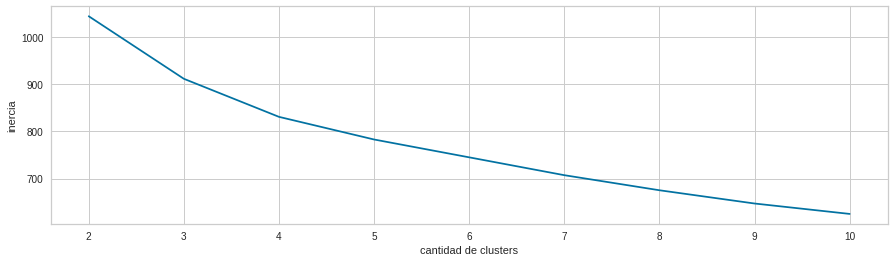

In [ ]:
#Ahora, una vez que se tienen los distintos valores de la inercia, se greafican para conocer el punto de inflexión, eel cual es un método para conocer el K adecuado

#Se declaran los arreglos de datos para "x" y "y" para el gráfico
x = list(inercia.keys())
y = list(inercia.values())

#Se grafican "y" contra "x":
plt.figure(figsize=(15,4))
plt.plot(x, y,'bx-')
plt.xlabel("cantidad de clusters")
plt.ylabel("inercia")

plt.show()

Según el gráfico no es claro el punto de inflexión por lo que vamos a aplicar el método de la silueta para lograr identificar el k más adecuado

- **Revisando el método de la silueta**


Vamos a graficar las distintas siluetas para observar su comportamiento en cada set de clústers generado

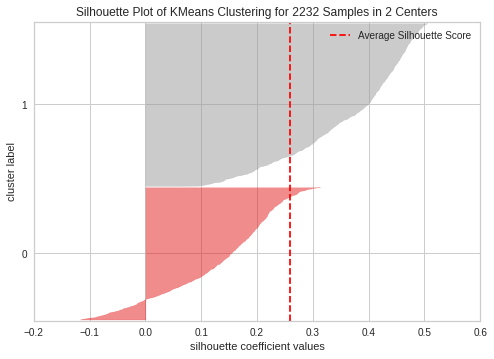

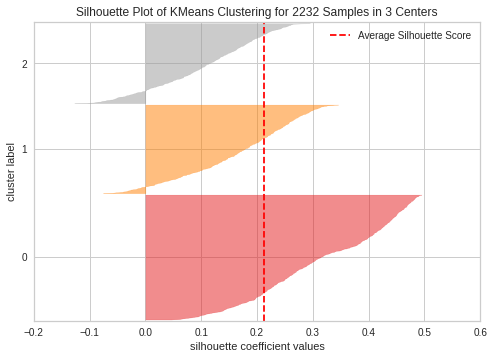

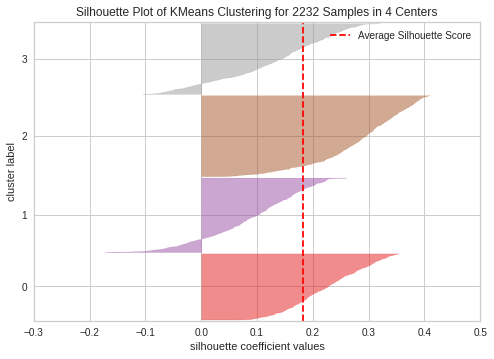

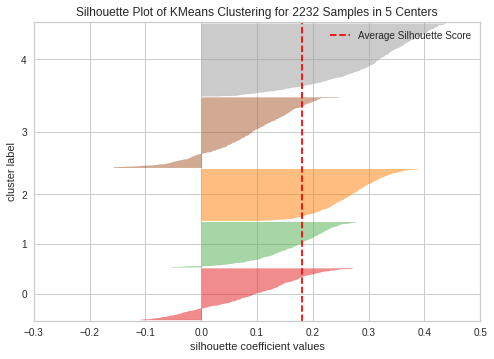

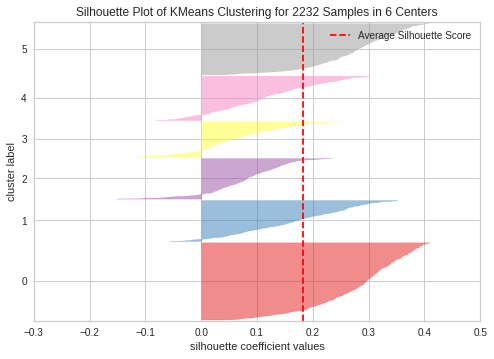

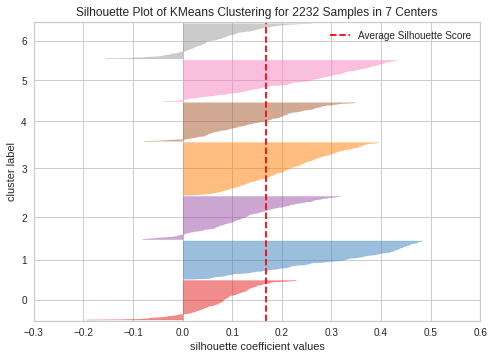

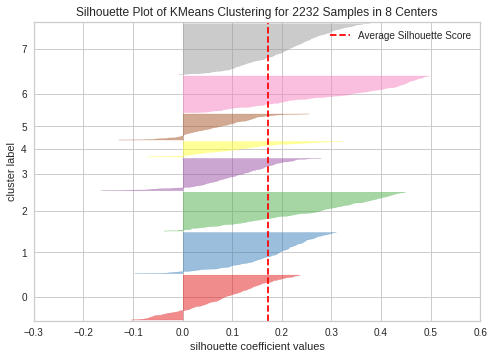

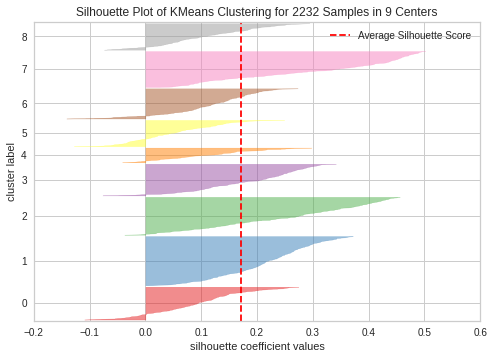

In [ ]:
# Se emplea un "for" para poder graficar todas las siluetas y poder compararlas
for k in range(2,10):
  kmedias_aplicado_silueta = KMeans(n_clusters = k, random_state = 1)
  graf_silueta = SilhouetteVisualizer(kmedias_aplicado_silueta)
  graf_silueta.fit(copia_datos_escalados)
  graf_silueta.show()

Según estos gráficos, el mejor set de clústers se obtiene con k = 3, dado que los clústers generados son de tamaño similar y su distancia hacia el promedio de la silueta es parecido.

**Cluster K-medias**

Ahora, a partir del algoritmo se clasifican los datos según el clúster

In [ ]:
#Ahora, se aplica el algoritmo de kmedias para k = 4, y se hace el fit del modelo a los datos "copia_datos_escalados"

cluster_kmedias = KMeans(n_clusters = 3, random_state = 1)
cluster_kmedias.fit(copia_datos_escalados)
#y_pred = kmeans.predict(copia_datos_escalados)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# Se incluyen las etiquetas que indican el clúster al que pertence cada fila de los datos escalados y también en los originales
copia_datos_escalados_etiquetas['etiquetas_kmedias1'] = cluster_kmedias.predict(copia_datos_escalados)
datos_con_etiquetas['etiquetas_kmedias1'] = cluster_kmedias.labels_

#Se revisa la columna con etiquetas del set de datos "datos con etiquetas"
datos_con_etiquetas.head()

,edad,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,monto_dulces,monto_oro,cant_compras_descuento,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,cant_campañas_acepta,etiquetas_kmedias1,etiquetas_jerarquico
0,52,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,2,2
1,61,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,2,1,2
2,64,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,1,1
3,55,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0
4,33,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,2,0,0


In [ ]:
#Revisamos la cantidad de filas o datos que contiene cada clúster
copia_datos_escalados_etiquetas["etiquetas_kmedias1"].value_counts()

0    950
1    674
2    608
Name: etiquetas_kmedias1, dtype: int64

In [ ]:
clusters_kmed = cluster_kmedias.fit_predict(copia_datos_escalados)
silueta_kmedias = round(silhouette_score(copia_datos_escalados, clusters_kmed),2)
print(silueta_kmedias)

0.21


Se observa que los clusters  generados tienen una cantidad de puntos muy similar entre sí, lo cual tiene sentido según lo que se observó en el gráfico de silueta.

**Ahora, se analiza el comportamiento de cada clúster de acuerdo a cada una de las variables**

In [ ]:
#Se crea una lista con los nombres de las columnas de los datos
cols_clusters = list(datos_escalados.columns)

#Se crea una función para graficar los clústers para los distintos algoritmos
def graficar_clusters(cols_clusters, datos_con_etiquetas, nombre_etiqueta):
  plt.figure(figsize = (25, 20))
  for i, variable in enumerate(cols_clusters):
    if i == 16:
      break
    #posición del gráfico
    plt.subplot(6, 3, i + 1)
    #boxplot
    sns.boxplot(y = datos_con_etiquetas[variable], x = datos_con_etiquetas[nombre_etiqueta])
    plt.tight_layout()
    plt.title(variable)
  plt.show()

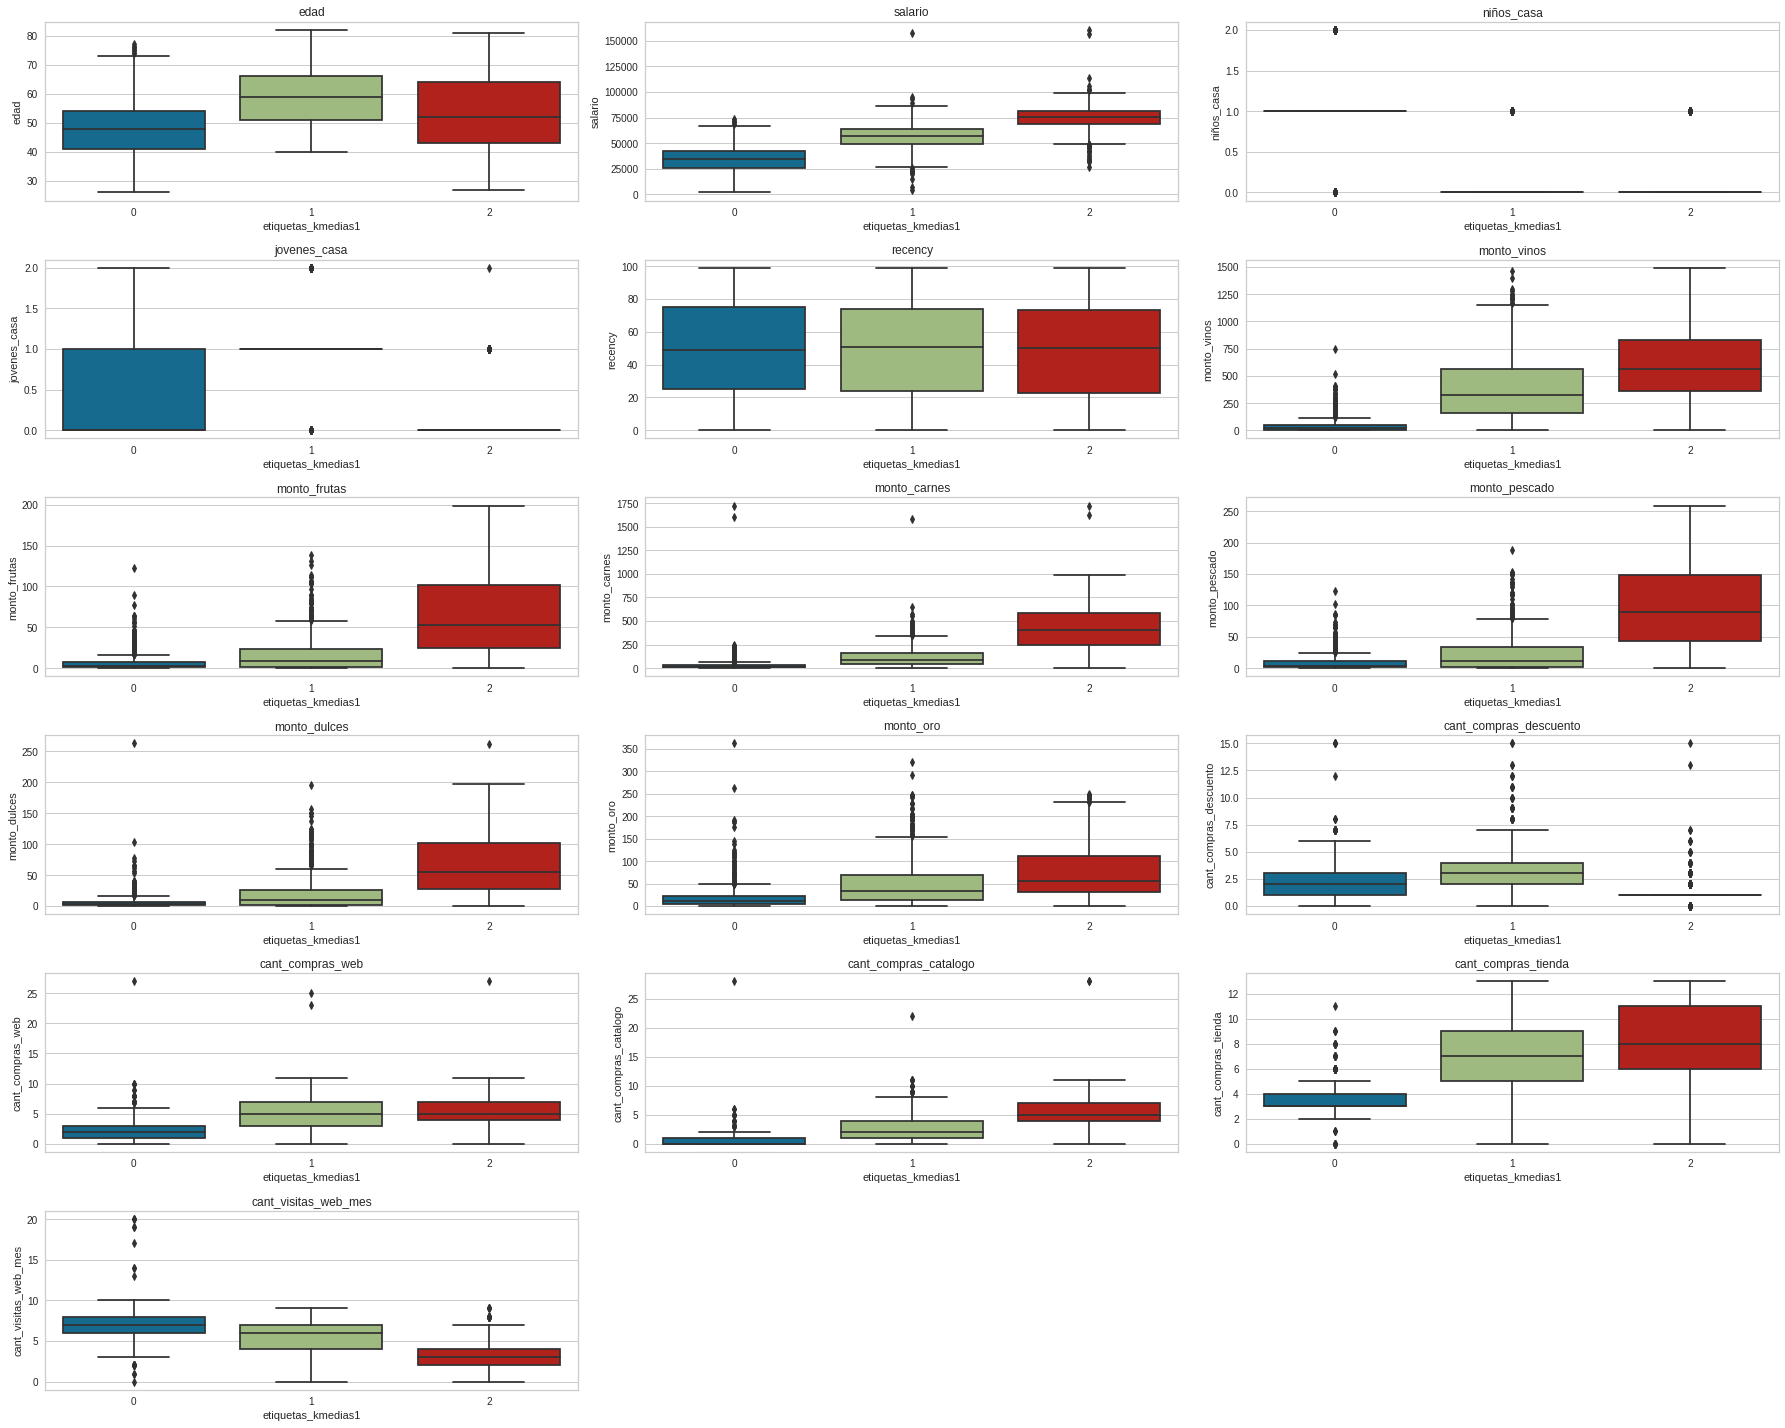

In [ ]:
# Se grafica un boxplot de cada clúster por medio de la función que se acaba de crear
graficar_clusters(cols_clusters, datos_con_etiquetas, "etiquetas_kmedias1")

## **Clúster jerárquico**

**Dendograma**:

Ahora aplicamos el dendograma para el clúster jerárquico

In [ ]:
#Se importan las librerías
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

Para aplicar el clúster jerárquico también es necesario conocer la cantidad de clústers que se quiere generar, para averiguarlo se aplica primero un dendograma, el cual muestra gráficamente la forma en la que se generan los clústers.

Para esto, se van a generar distintos dedogramas, cada uno con un método "linkage" distinto para definir cuál es más efectivo para desarrollar el modelo. El "linkage" define la manera en la que el algoritmo mide las distancias entre los puntos para formar los clústers.

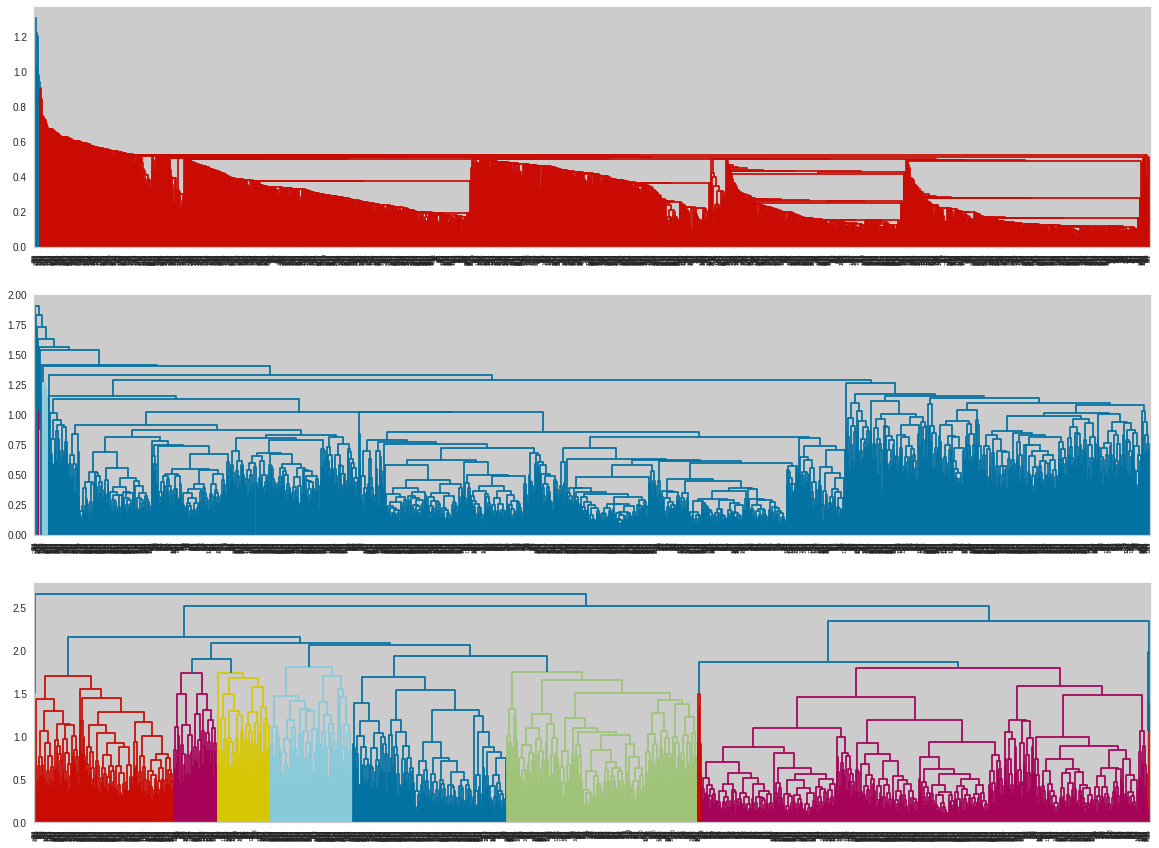

In [ ]:
# Incialmente se van a revisar tres métodos linkage distintos" "single", "average", "complete"

#Se crea lista con los nombres de los métodos por probar
metodos_linkage1 = ["single", "average", "complete"]

#Se grafica el resultado de los métodos mediante un "for":
figura, eje = plt.subplots(len(metodos_linkage1), 1, figsize=(20, 15))

for i, metodo in enumerate(metodos_linkage1):
   dendrogram(linkage(copia_datos_escalados, metric = 'euclidean', method = metodo), ax = eje[i]);
  

De estos métodos probados el mejor es el que se obtiene con linkage = "complete"

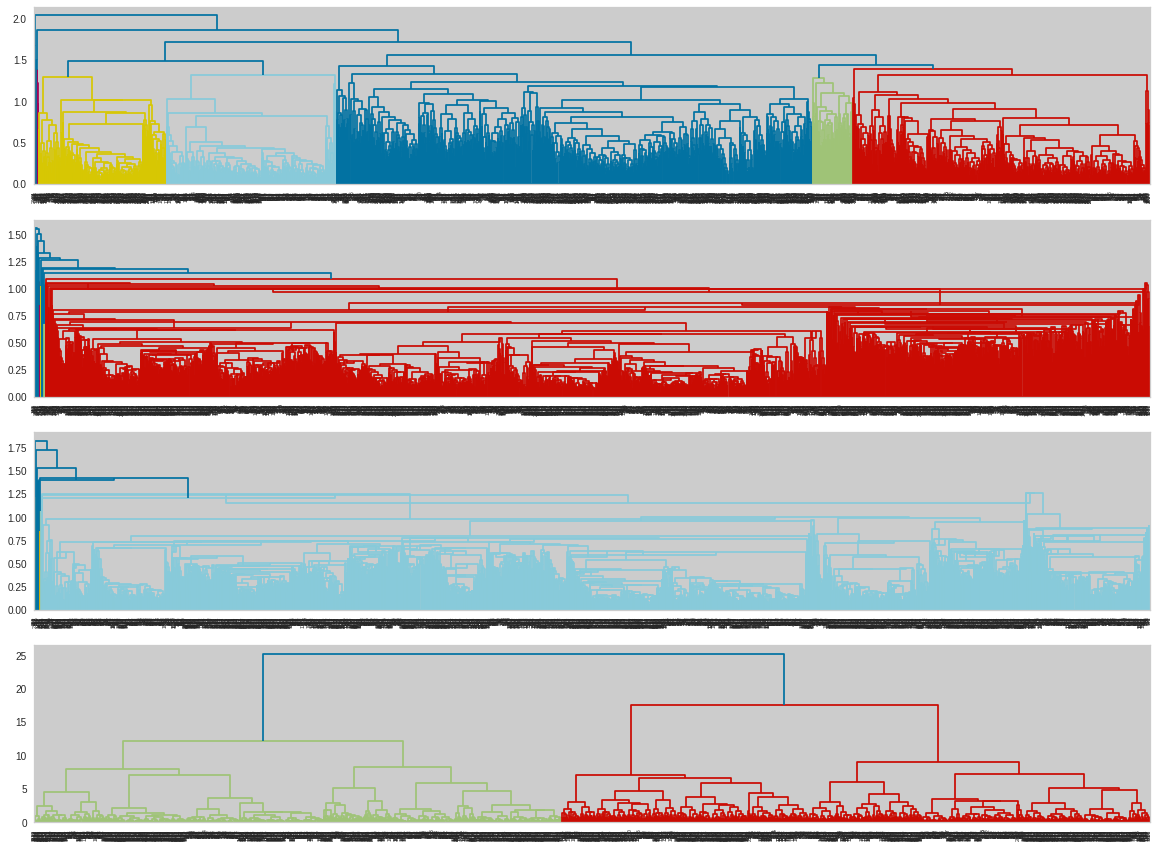

In [ ]:
# Ahora se revisan los otros cuatro métodos linkage: "weighted", "centroid", "median", "ward" 

#listo con los métodos faltantes
metodos_linkage2 = ["weighted", "centroid", "median", "ward"]

# gráfico de los métodos
figura, eje = plt.subplots(len(metodos_linkage2), 1, figsize = (20, 15))

for i, metodo in enumerate(metodos_linkage2):
   dendrogram(linkage(copia_datos_escalados, metric = 'euclidean', method = metodo), ax = eje[i]);

El ward linkage ofrece la mejor opción: los clusters están bien separados, lo que se comprueba a través de las longitudes verticales.
Este algoritmo requiere que la distancia sea euclideana

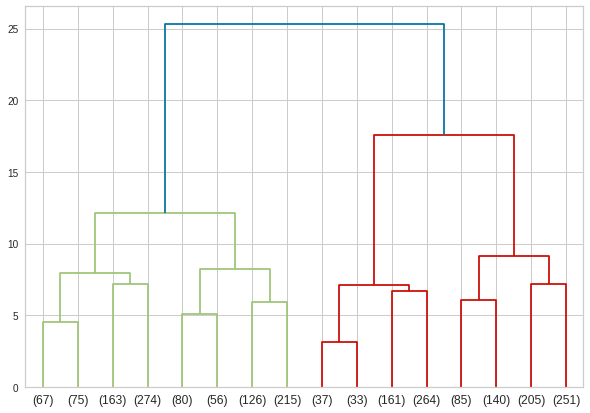

In [ ]:
# Se grafica la sección superior del dendograma para determinar cuántos clústers se deberían generar en este caso 

#1. se  aplica el ward a los datos
linkage_ward = ward(copia_datos_escalados)

# 2. se grafica el dendograma de las similitudes de grupos jerárquicos
plt.figure(figsize=(10, 7))
dendrogram(linkage_ward, truncate_mode = 'level', p = 3)

plt.show()


Según el dendograma, se trata de 3 clústers. Ahora, aplicamos el cluster de tipo jerárquico con la cantidad de clústers sugerida. 

**Cluster Aglomerativo jerárquico**

Una vez definida la cantidad de clústers, se aplica el algoritmo de clúster jerárquico

In [ ]:
# Se importa el método de clusterización de la librería de scikit-learn
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Se inicializa el algoritmo de clusterización
cluster_jerarquico = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

#Se aplica el algoritmo a los datos para que se clasifique cada fila de datos en un clúster
cluster_jerarquico.fit(copia_datos_escalados)

AgglomerativeClustering(n_clusters=3)

In [ ]:
#Se agregan las etiquetas a los datos para definir a qué clúster pertenecen
copia_datos_escalados_etiquetas["etiquetas_jerarquico"] = cluster_jerarquico.labels_
datos_con_etiquetas["etiquetas_jerarquico"] = cluster_jerarquico.labels_

copia_datos_escalados_etiquetas.head()

,edad,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,monto_dulces,monto_oro,cant_compras_descuento,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,cant_campañas_acepta,etiquetas_kmedias1,etiquetas_jerarquico
0,0.464286,0.522433,0.0,0.0,0.0,0.126591,0.522613,0.219710,0.428571,0.718631,0.602210,0.066667,0.148148,0.142857,0.461538,0.05,0.2,2,2
1,0.625000,0.348023,0.0,0.0,0.0,0.310784,0.025126,0.037101,0.027027,0.000000,0.102210,0.066667,0.259259,0.107143,0.538462,0.25,0.4,1,2
2,0.678571,0.411993,0.0,0.5,0.0,0.089752,0.055276,0.034203,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.10,0.0,1,1
3,0.517857,0.193270,0.5,0.5,0.0,0.006698,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,0.037037,0.000000,0.153846,0.35,0.0,0,0
4,0.125000,0.124119,0.5,0.0,0.0,0.004019,0.080402,0.013913,0.042471,0.000000,0.093923,0.133333,0.111111,0.035714,0.153846,0.35,0.4,0,0


In [ ]:
# Se revisa la cantidad de datos que contiene cada clúster
copia_datos_escalados_etiquetas["etiquetas_jerarquico"].value_counts()

0    1056
1     681
2     495
Name: etiquetas_jerarquico, dtype: int64

In [ ]:
clusters_j = cluster_jerarquico.fit_predict(copia_datos_escalados)
silueta_jerarquico = round(silhouette_score(copia_datos_escalados, clusters_j),2)
print(silueta_jerarquico)

0.21


Los clústers que se obtuvieron son similares entre sí en cuanto a cantidad de datos.

Ahora, se grafica cada clúster en función de las distintas variables para anlizar su comportamiento

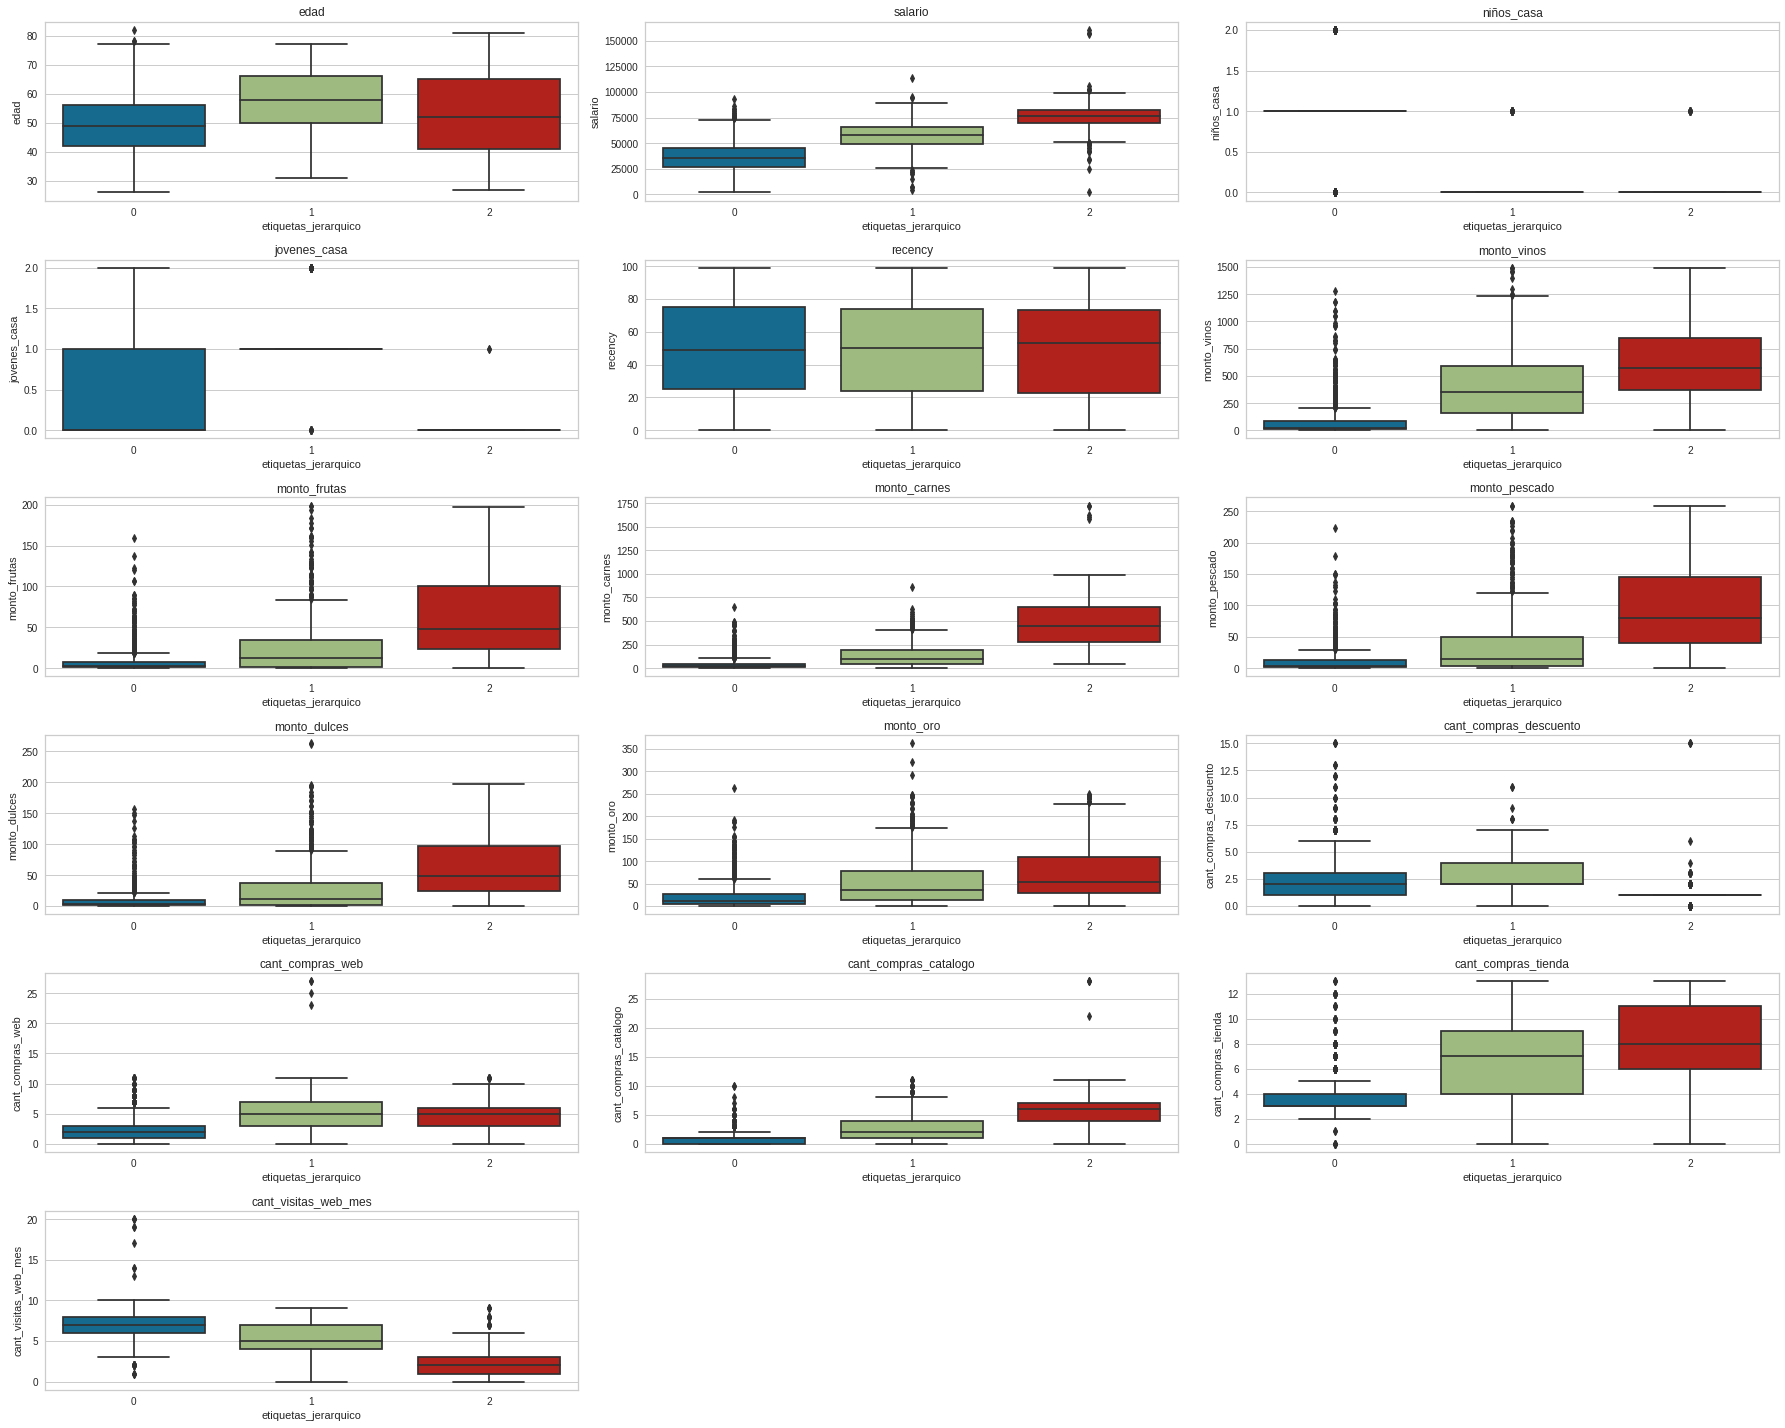

In [ ]:
#Se llama a la función "graficar_clusters"
graficar_clusters(cols_clusters, datos_con_etiquetas, "etiquetas_jerarquico")

## **Clústers con algoritmo Gaussian Mixture**

In [ ]:
# Se inicializa el algoritmo de GaussianMixture 
cluster_gaussiano = GaussianMixture(n_components = 4, random_state = 1)

#Se aplica a los datos
cluster_gaussiano.fit(copia_datos_escalados)

GaussianMixture(n_components=4, random_state=1)

In [ ]:
# Se agrega la etiqueta de cada clúster al set de datos escalados y a los origininales
copia_datos_escalados_etiquetas["etiquetas_gaussiano"] = cluster_gaussiano.predict(copia_datos_escalados)
datos_con_etiquetas["etiquetas_gaussiano"] = cluster_gaussiano.predict(copia_datos_escalados)

#Se revisan los datos
copia_datos_escalados_etiquetas.head()

,edad,salario,niños_casa,jovenes_casa,recency,monto_vinos,monto_frutas,monto_carnes,monto_pescado,monto_dulces,monto_oro,cant_compras_descuento,cant_compras_web,cant_compras_catalogo,cant_compras_tienda,cant_visitas_web_mes,cant_campañas_acepta,etiquetas_kmedias1,etiquetas_jerarquico,etiquetas_gaussiano
0,0.464286,0.522433,0.0,0.0,0.0,0.126591,0.522613,0.219710,0.428571,0.718631,0.602210,0.066667,0.148148,0.142857,0.461538,0.05,0.2,2,2,1
1,0.625000,0.348023,0.0,0.0,0.0,0.310784,0.025126,0.037101,0.027027,0.000000,0.102210,0.066667,0.259259,0.107143,0.538462,0.25,0.4,1,2,1
2,0.678571,0.411993,0.0,0.5,0.0,0.089752,0.055276,0.034203,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.10,0.0,1,1,0
3,0.517857,0.193270,0.5,0.5,0.0,0.006698,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,0.037037,0.000000,0.153846,0.35,0.0,0,0,0
4,0.125000,0.124119,0.5,0.0,0.0,0.004019,0.080402,0.013913,0.042471,0.000000,0.093923,0.133333,0.111111,0.035714,0.153846,0.35,0.4,0,0,2


In [ ]:
# Medimos la cantidad de datos en cada uno de los nuevos clusters generados
copia_datos_escalados_etiquetas.etiquetas_gaussiano.value_counts()

0    627
3    547
1    537
2    521
Name: etiquetas_gaussiano, dtype: int64

In [ ]:
#Se mide la silueta de estos clústers
clusters_gaus = cluster_gaussiano.fit_predict(copia_datos_escalados)
silueta_gauss = round(silhouette_score(copia_datos_escalados, clusters_gaus),2)
print(silueta_gauss)

0.15


In [ ]:
#Se llama a la función "graficar_clusters"
graficar_clusters(cols_clusters, datos_con_etiquetas, "etiquetas_gaussiano")

## **Comparar el rendimiento de los clústers**

In [ ]:
print(pd.DataFrame({"Medida": ["Coeficiente silueta"],"Kmedias": [silueta_kmedias], "Jerárquico": [silueta_jerarquico], "Gaussian Mixture": [silueta_gauss]}))

                Medida  Kmedias  Jerárquico  Gaussian Mixture
0  Coeficiente silueta     0.21        0.21              0.15


A partir de esta información se selecciona el algoritmo de K-medias:

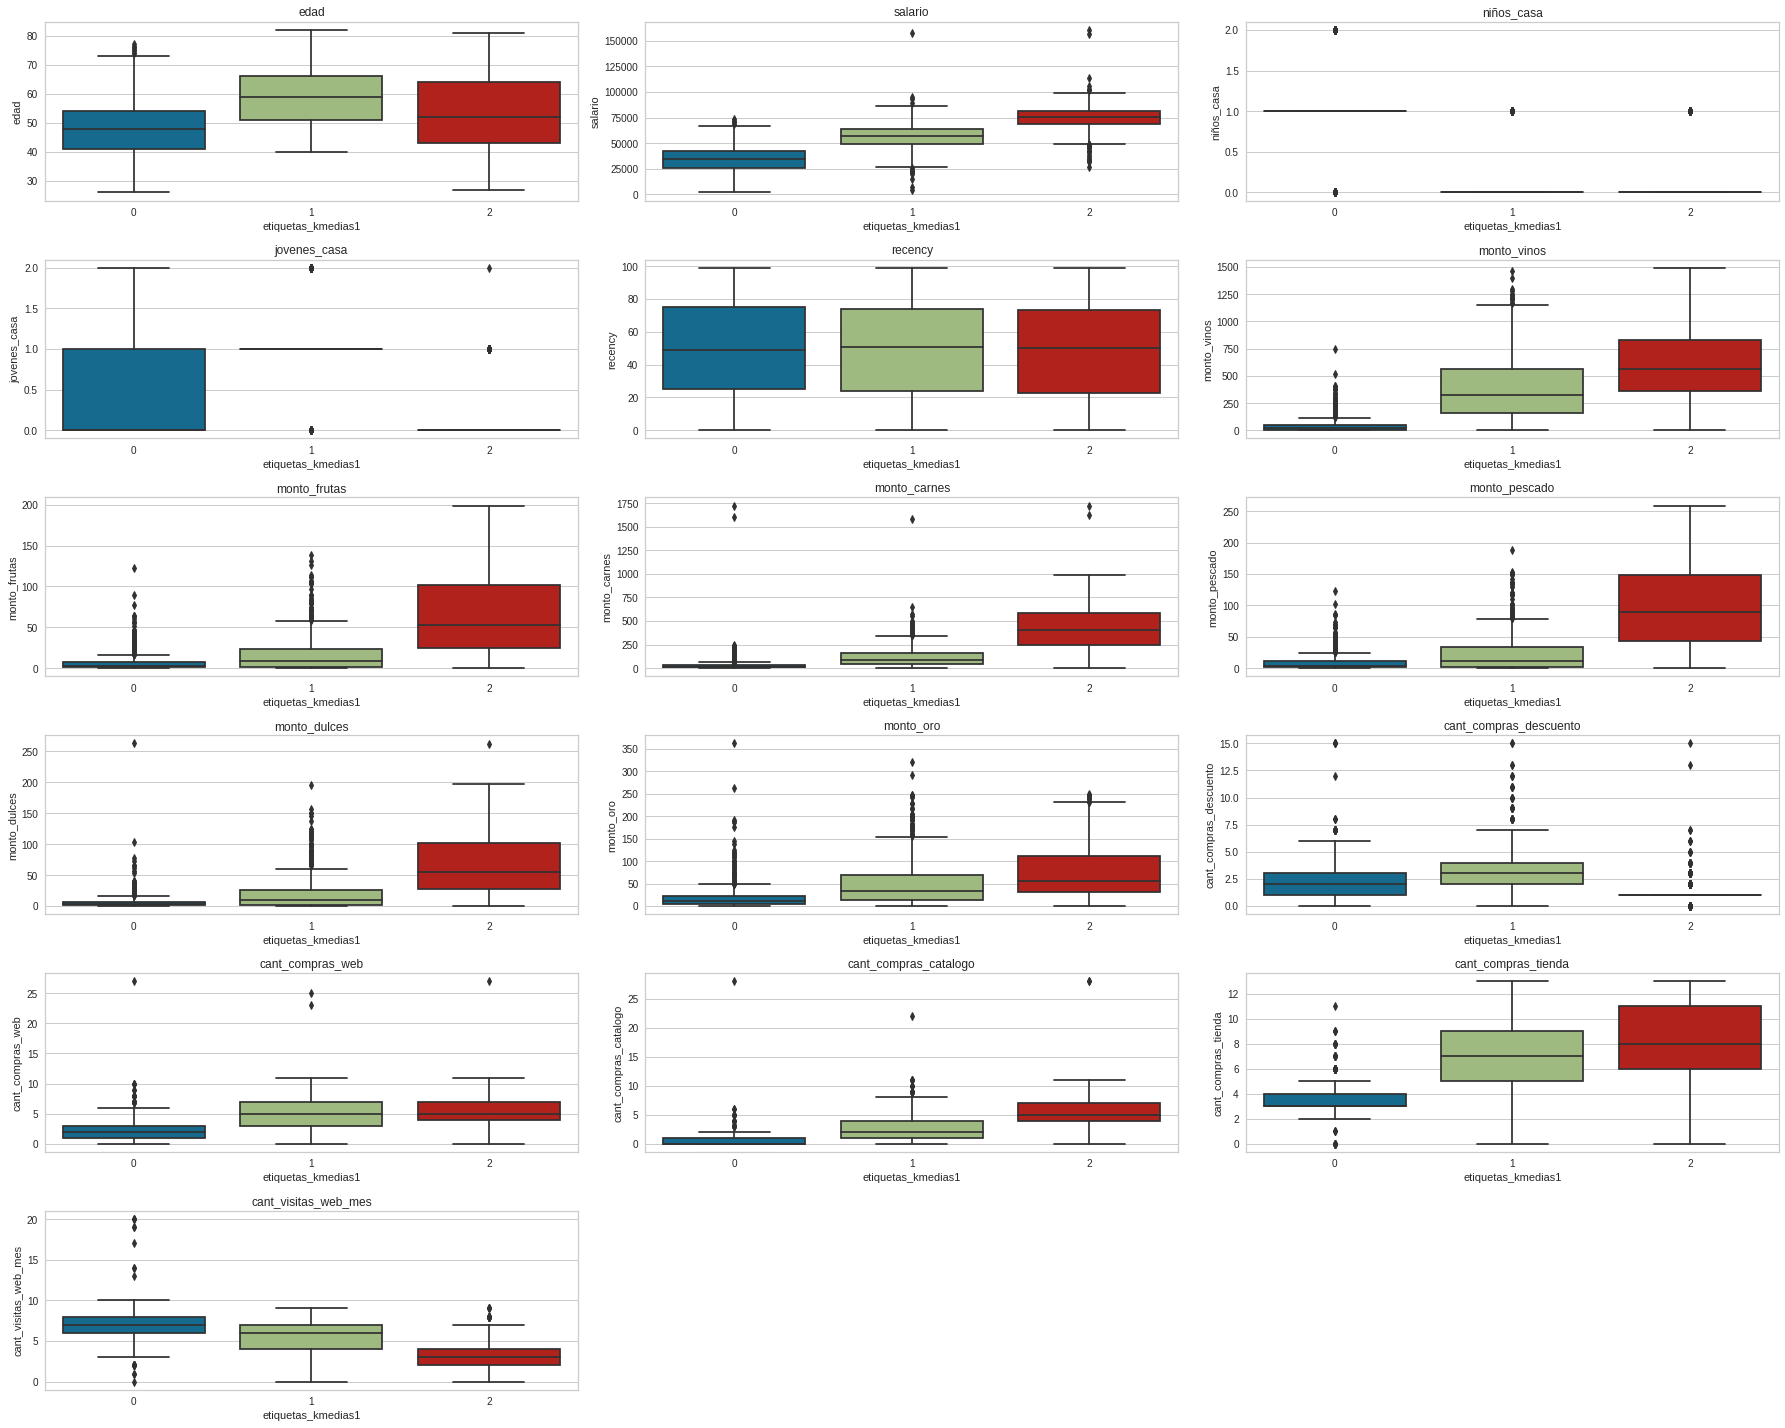

In [ ]:
graficar_clusters(cols_clusters, datos_con_etiquetas, "etiquetas_kmedias1")

In [ ]:

media = datos_con_etiquetas.groupby("etiquetas_kmedias1").mean()
medias_kmedias = pd.DataFrame(media)
medias_kmedias.index = ["Medias_cluster_1", "Medias_cluster_2", "Medias_cluster_3"]
medias_kmedias[cols_clusters].T

,Medias_cluster_1,Medias_cluster_2,Medias_cluster_3
edad,48.890526,58.854599,53.297697
salario,33928.037895,56224.274481,74683.095395
niños_casa,0.921053,0.123145,0.054276
jovenes_casa,0.368421,1.032641,0.141447
recency,49.180000,49.140950,48.927632
monto_vinos,47.656842,392.596439,608.582237
monto_frutas,5.928421,18.043027,67.361842
monto_carnes,31.252632,118.339763,434.039474
monto_pescado,8.031579,23.860534,99.034539
monto_dulces,6.004211,19.642433,68.430921


## Caracterización de los clústers

- Clúster 1


Este clúster tiene la edad media mas baja de los 3 con 48 años, lo cual se relaciona con la cantidad de niños promedio en el hogar, ya que tienen 0.92 niños en promedio mientras que una minoría tiene adolescentes, por lo que se trata de familias jóvenes cuyo salario es, de los tres grupos, el inferior.  
De los tres grupos son quienes gastan menos en las distintas categorías de productos, sin embargo, en lo que más han gastado en promedio durante los últimos dos años es en vinos, seguido de las carnes. Por otro lado, en lo que menos han invertido es en frutas y en dulces. 
Son los que más visitan la página web de la tienda, en promedio la han visitado 6 veces al mes durante estos dos años. 
En este periodo han realizado compras en la tienda en promedio 6 veces, mientras que, la cantidad de compras que han hecho en la web es de apenas 2. Al analizar esto y compararlo con las visitas web puede suponerse que emplean la página como un catálogo o para realizar comparaciones de precios con otras tiendas, esta hipótesis puede analizarse más a fondo para determinar la causa de esto. 
En cuanto a la cantidad de campañas publicitarias aceptadas, son los que menos se ven influenciados por ellas, este es otro punto importante para tener en cuenta.

- Clúster 2


Los clientes que pertenecen a esta agrupación tienen la mayor edad promedio de los tres grupos, su mayoría no tiene niños, pero en promedio, tienen un adolescente en casa. Su gasto en los distintos productos analizados es intermedio al compararlo con los otros grupos. En los últimos dos años el monto mayor de sus compras pertenece a la categoría de vinos, seguido por las carnes, mismo comportamiento presente en los otros dos grupos, lo que cambia es el monto promedio. Las categorías que menos consumen son frutas y dulces, al igual que en los otros clústers.
En promedio son quienes más compras en descuento han realizado en este periodo, y son los que mas realizan compras en la web, visitan la tienda mas que el clúster 1 pero menos que el tercero, e igual que el primer grupo, parece que las campañas no tienen un gran efecto sobre ellos.

- Clúster 3:


Se trata de un grupo cuya edad se encuentra en el medio de los otros dos clústers, sin embargo, en su mayoría no tienen hijos pequeños ni adolescentes, su ingreso es el mayor de los tres segmentos estudiados. En cuanto a los montos destinados a los productos de consumo, respeta el orden de las  otras agrupaciones sin embargo, a diferencia de los otros dos, en tercer lugar se encuentran los productos de pescado mientras que en el clúster 1 y 2 el otro tiene ese puesto. 
Son quienes han aceptado mas campañas en promedio, ya que en promedio este numero es 0.97, y quienes compran más frecuentemente en la tienda física (8.51 veces en promedio) y por catálogo (en promedio 5.75 veces). Por otro lado, son quienes menos compran en descuento de los tres grupos y menos visitan la página web.
